In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-02-07 22:52:54,272] INFO in core: Started 


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
IRA,45.0,0.289363,0.319437,-0.651958,0.168352,0.293849,0.472171,0.957286,0.881008,14.291009,4.030473,-0.673255
S&P 500,45.0,0.131688,0.234334,-0.510550,0.038120,0.203465,0.265528,0.637734,0.528100,6.289254,3.078777,-0.895883
Alibaba,45.0,0.231229,0.697876,-1.987437,-0.083184,0.447441,0.705640,1.260611,0.319961,11.212122,10.851265,-1.096842
M1,45.0,0.055630,0.203782,-0.469007,-0.030891,0.134015,0.171890,0.467614,0.234042,2.212706,3.225956,-0.947583
CSI 300,45.0,-0.015406,0.803588,-2.366262,-0.173499,0.252812,0.517426,1.100337,-0.029047,-1.383222,15.608808,-1.239046


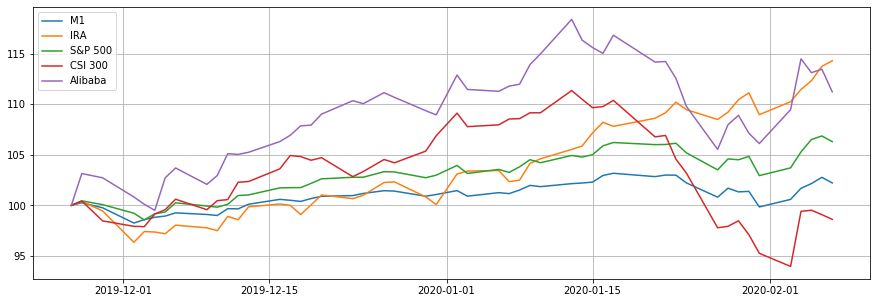

In [4]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 55)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 55)})
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

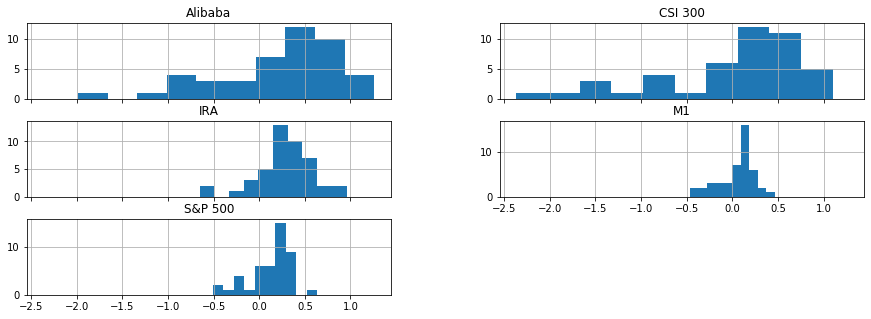

In [5]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))